In [1]:
import pandas as pd
import regex as re
import numpy as np

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from scipy import sparse
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:


train = pd.read_csv('/content/drive/MyDrive/NLP_project_dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/NLP_project_dataset/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/NLP_project_dataset/sample_submission.csv')
print(f'Train_shape: {train.shape}, Test_shape: {test.shape}, Sample_shape: {sample.shape}')
train

Train_shape: (36765, 5), Test_shape: (10, 4), Sample_shape: (10, 4)


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
...,...,...,...,...,...
36760,9f63b687e76a,FFA381E58FC6,For many people they don't like only asking on...,Claim,Adequate
36761,9d5bd7d86212,FFA381E58FC6,also people have different views and opinions ...,Claim,Adequate
36762,f1b78becd573,FFA381E58FC6,Advice is something that can impact a persons ...,Position,Adequate
36763,cc184624ca8e,FFA381E58FC6,someone can use everything that many people sa...,Evidence,Ineffective


In [3]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=20, window=2, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007,  negative=20, workers=cores-1)

TypeError: ignored

In [ ]:
def cleanup_text(text):
    words = re.sub(pattern = '[^a-zA-Z]',repl = ' ', string = text)
    words = words.lower()
    return words

In [ ]:
text_preprocessed = train['discourse_text'].apply(cleanup_text)
text_preprocessed
train['text_preprocessed'] = text_preprocessed
display(train.head())

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,text_preprocessed
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,hi i m isaac i m going to be writing about h...
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,on my perspective i think that the face is a ...
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,i think that the face is a natural landform be...
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,if life was on mars we would know by now the...
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,people thought that the face was formed by ali...


In [7]:
!pip install transformers datasets
import datasets, transformers

from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import AutoModelForMaskedLM
os.environ["WANDB_DISABLED"] = "true"

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from transformers import TFBertModel
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.4 MB/s eta 0:00:00


In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
# Configuration
#EPOCHS = 10
BATCH_SIZE =56
MAX_LEN = 128

In [ ]:
# Texts, tokenizer inputs and Maxlength of inputs
def bert_encode(texts, tokenizer, max_len=MAX_LEN):
    input_ids = []
    token_type_ids = []
    attention_mask = []
    
    for text in texts:
        token = tokenizer(text, max_length=max_len, truncation=True, padding='max_length',
                         add_special_tokens=True)
        input_ids.append(token['input_ids'])
        token_type_ids.append(token['token_type_ids'])
        attention_mask.append(token['attention_mask'])
    
    return np.array(input_ids), np.array(token_type_ids), np.array(attention_mask)

In [ ]:
# First load the real tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [ ]:
sep = tokenizer.sep_token
sep

'[SEP]'

In [ ]:
train['inputs'] = train.discourse_type + sep +train.discourse_text
train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,text_preprocessed,inputs
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,hi i m isaac i m going to be writing about h...,"Lead[SEP]Hi, i'm Isaac, i'm going to be writin..."
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,on my perspective i think that the face is a ...,"Position[SEP]On my perspective, I think that t..."
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,i think that the face is a natural landform be...,Claim[SEP]I think that the face is a natural l...
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,if life was on mars we would know by now the...,"Evidence[SEP]If life was on Mars, we would kno..."
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,people thought that the face was formed by ali...,Counterclaim[SEP]People thought that the face ...


In [ ]:
label_map = {"discourse_effectiveness": {"Ineffective": 0, "Adequate": 1, "Effective": 2}}
train = train.replace(label_map)
train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,text_preprocessed,inputs
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,1,hi i m isaac i m going to be writing about h...,"Lead[SEP]Hi, i'm Isaac, i'm going to be writin..."
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,1,on my perspective i think that the face is a ...,"Position[SEP]On my perspective, I think that t..."
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,1,i think that the face is a natural landform be...,Claim[SEP]I think that the face is a natural l...
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,1,if life was on mars we would know by now the...,"Evidence[SEP]If life was on Mars, we would kno..."
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,1,people thought that the face was formed by ali...,Counterclaim[SEP]People thought that the face ...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train['inputs'], train['discourse_effectiveness'], test_size=0.1, random_state=42)

X_train = bert_encode(X_train.astype(str), tokenizer)
X_valid = bert_encode(X_valid.astype(str), tokenizer)

y_train = y_train.values
y_valid = y_valid.values

X_train

(array([[  101, 23064, 16659, ...,     0,     0,     0],
        [  101,   140, 20737, ...,     0,     0,     0],
        [  101, 18959,  5053, ...,     0,     0,     0],
        ...,
        [  101, 10440,   102, ...,     0,     0,     0],
        [  101, 16573,   102, ...,     0,     0,     0],
        [  101, 16752,  1665, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]))

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
def build_model(bert_model, max_len=MAX_LEN):    
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    token_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="token_type_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    sequence_output = bert_model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[0]
    clf_output = sequence_output[:, 0, :]
    clf_output = Dropout(.1)(clf_output)
    out = Dense(3, activation='softmax')(clf_output)
    
    model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=out)
    model.compile(Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
transformer_layer = (TFBertModel.from_pretrained('bert-base-cased'))
model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]',   

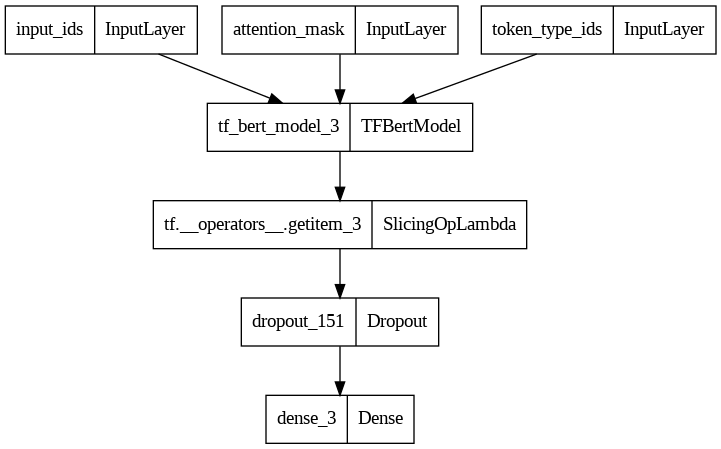

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
valid_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), TensorSpec(shape=(None, 128), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_history = model.fit(
    train_dataset,
    steps_per_epoch=20,
    validation_data=valid_dataset,
    epochs=15
)

Epoch 1/15


20/20 [==============================] - 123s 4s/step - loss: 1.0617 - accuracy: 0.5304 - val_loss: 0.8378 - val_accuracy: 0.6209
Epoch 2/15
20/20 [==============================] - 58s 3s/step - loss: 0.8412 - accuracy: 0.6268 - val_loss: 0.7886 - val_accuracy: 0.6432
Epoch 3/15
20/20 [==============================] - 57s 3s/step - loss: 0.7855 - accuracy: 0.6696 - val_loss: 0.7820 - val_accuracy: 0.6386
Epoch 4/15
20/20 [==============================] - 57s 3s/step - loss: 0.7721 - accuracy: 0.6536 - val_loss: 0.7646 - val_accuracy: 0.6519
Epoch 5/15
20/20 [==============================] - 57s 3s/step - loss: 0.8030 - accuracy: 0.6598 - val_loss: 0.8978 - val_accuracy: 0.6035
Epoch 6/15
20/20 [==============================] - 67s 3s/step - loss: 0.8331 - accuracy: 0.6116 - val_loss: 0.8404 - val_accuracy: 0.6478
Epoch 7/15
20/20 [==============================] - 57s 3s/step - loss: 0.8212 - accuracy: 0.6366 - val_loss: 0.8138 - val_accuracy: 0.6372
Epoch 8/15
20/20 [============

**Test Data - Prediction**

In [ ]:
# Clean the text data
test_preprocessed = test['discourse_text'].apply(cleanup_text)
test_preprocessed
test['text_preprocessed'] =  test_preprocessed
test.head()

,discourse_id,essay_id,discourse_text,discourse_type,text_preprocessed
0,a261b6e14276,D72CB1C11673,Making choices in life can be very difficult. ...,Lead,making choices in life can be very difficult ...
1,5a88900e7dc1,D72CB1C11673,Seeking multiple opinions can help a person ma...,Position,seeking multiple opinions can help a person ma...
2,9790d835736b,D72CB1C11673,it can decrease stress levels,Claim,it can decrease stress levels
3,75ce6d68b67b,D72CB1C11673,a great chance to learn something new,Claim,a great chance to learn something new
4,93578d946723,D72CB1C11673,can be very helpful and beneficial.,Claim,can be very helpful and beneficial


In [ ]:
test['processed'] = test.discourse_type + sep +test.discourse_text

In [ ]:
test_processed = bert_encode(test.processed.astype(str), tokenizer)

**Predict output**

In [ ]:
preds = model.predict(test_processed, verbose=1)
preds

1/1 [==============================] - 5s 5s/step


array([[0.00465521, 0.3785703 , 0.6167745 ],
       [0.0108195 , 0.67346305, 0.31571743],
       [0.00519242, 0.44220924, 0.5525983 ],
       [0.02266203, 0.6208681 , 0.3564699 ],
       [0.01012761, 0.6007206 , 0.38915178],
       [0.00570992, 0.2578592 , 0.73643094],
       [0.0055791 , 0.27316684, 0.72125405],
       [0.00800622, 0.5355992 , 0.45639458],
       [0.00999621, 0.30195218, 0.6880516 ],
       [0.01147872, 0.47199368, 0.51652765]], dtype=float32)

In [ ]:
sample['Ineffective'] = preds[:,0]
sample['Adequate'] = preds[:,1]
sample['Effective'] = preds[:,2]
sample.sample(2)

,discourse_id,Ineffective,Adequate,Effective
8,739a6d00f44a,0.009996,0.301952,0.688052
7,c668ff840720,0.008006,0.535599,0.456395


In [ ]:
sample.to_csv("submission.csv", index=False)
print('Successfully executed!')
sample

Successfully executed!


,discourse_id,Ineffective,Adequate,Effective
0,a261b6e14276,0.004655,0.378570,0.616774
1,5a88900e7dc1,0.010819,0.673463,0.315717
2,9790d835736b,0.005192,0.442209,0.552598
3,75ce6d68b67b,0.022662,0.620868,0.356470
4,93578d946723,0.010128,0.600721,0.389152
5,2e214524dbe3,0.005710,0.257859,0.736431
6,84812fc2ab9f,0.005579,0.273167,0.721254
7,c668ff840720,0.008006,0.535599,0.456395
8,739a6d00f44a,0.009996,0.301952,0.688052
9,bcfae2c9a244,0.011479,0.471994,0.516528
